# Quadtree
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [svg-quadtree.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Generative/svg-quadtree.ipynb)
---
2D image partition using quadtrees and SVG graphics.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import imageio

## Useful functions
---

In [2]:
def display_svg(data):
    # Display SVG
    from IPython.display import SVG, display
    display(SVG(data))

## Quadtree algorithm
---

In [3]:
class Node():
    def __init__(self, x, y, dx, dy, mu, std):
        self.x = x
        self.y = y
        self.dx = dx
        self.dy = dy
        self.mu = mu
        self.std = std
        self.children = []

In [4]:
class QTree():
    def __init__(self, IMG):
        dy, dx, c = IMG.shape
        mu = np.median(IMG.reshape(-1, 3), axis=0).astype(int)
        std = np.std(IMG)
        self.root = Node(0, 0, dx, dy, mu, std)
        self.IMG = IMG

    def subdivide(self, d_max, k_std):
        recursive_subdivide(self.root, self.IMG, d_max, k_std)

    def get_leaves(self):
        return find_leaves(self.root)

### Support functions
---

In [5]:
def divided_node(IMG, x, y, dx, dy):
    # Build divided node
    img_ = IMG[y:y+dy, x:x+dx]
    mu_ = np.median(img_.reshape(-1, 3), axis=0).astype(int)
    std_ = np.std(img_)
    return Node(x, y, dx, dy, mu_, std_)

def recursive_subdivide(node, IMG, d_max, std_max):
    # Subdivide node by 4 if condition is satisfied
    x, y = node.x, node.y
    dx, dy = node.dx, node.dy
    mu, std = node.mu, node.std

    if (
        dx < d_max or
        std < std_max
    ): return

    # Node 1
    x_, y_ = x, y
    dx_, dy_ = dx//2, dy//2
    n1 = divided_node(IMG, x_, y_, dx_, dy_)
    recursive_subdivide(n1, IMG, d_max, std_max)

    # Node 2
    x_, y_ = x + dx//2, y
    dx_, dy_ = dx//2, dy//2
    n2 = divided_node(IMG, x_, y_, dx_, dy_)
    recursive_subdivide(n2, IMG, d_max, std_max)

    # Node 3
    x_, y_ = x, y + dy//2
    dx_, dy_ = dx//2, dy//2
    n3 = divided_node(IMG, x_, y_, dx_, dy_)
    recursive_subdivide(n3, IMG, d_max, std_max)

    # Node 4
    x_, y_ = x + dx//2, y + dy//2
    dx_, dy_ = dx//2, dy//2
    n4 = divided_node(IMG, x_, y_, dx_, dy_)
    recursive_subdivide(n4, IMG, d_max, std_max)

    node.children = [n1, n2, n3, n4]

def find_leaves(node):
    # Find all leaves on the tree
    if not node.children:
        return [node]
    leaves = []
    for leaf in node.children:
        leaves += find_leaves(leaf)
    return leaves

## Image partition to SVG
---

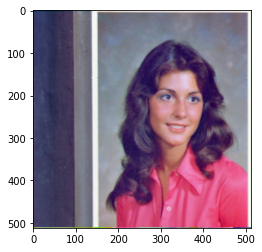

In [6]:
# Input image
IMG = imageio.imread('../_data/woman01.png')
dy, dx, c = IMG.shape
plt.imshow(IMG)
plt.show()

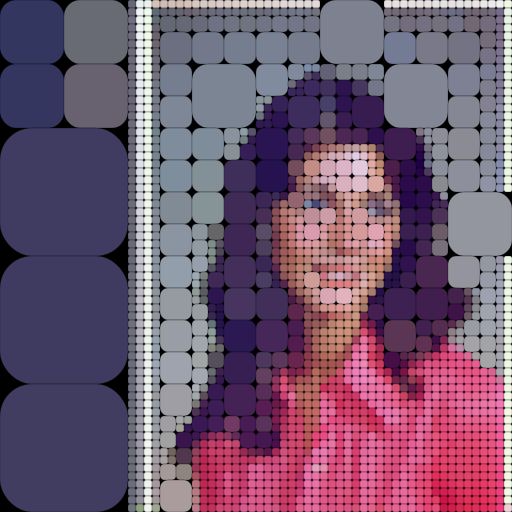

In [7]:
# Init SVG
SVG = f'''<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" 
    "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd"
>
<svg id="image"
    width="{dx}px" height="{dy}px" 
    xmlns="http://www.w3.org/2000/svg"
    xmlns:xlink="http://www.w3.org/1999/xlink"
>
'''

SVG += "<style>rect {stroke: black; stroke-width: 0.2;}</style>\n"

SVG += f'<rect width="100%" height="100%" fill="black" />\n'

# Run quadtree algorithm
tree = QTree(IMG)
tree.subdivide(16, 30)

leaves = tree.get_leaves()

# Draw leaves
for leaf in leaves:
    x, y = leaf.x, leaf.y
    w, h = leaf.dx, leaf.dy
    r, g, b = leaf.mu
    rx = w//4
    SVG += f'<rect x="{x}" y="{y}" width="{w}" height="{h}" fill="rgb({r}, {g}, {b})" rx="{rx}" />\n'

SVG += '</svg>\n'

display_svg(SVG)